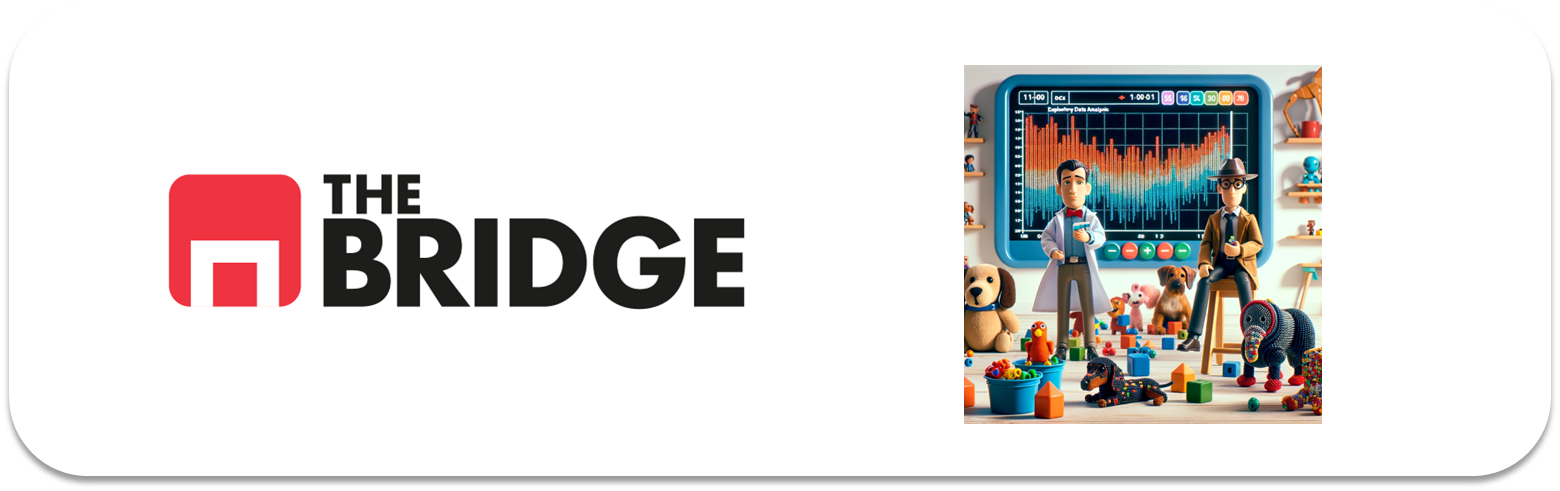

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [19]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [8]:
df_path = "./data./titanic2.csv"
df_titanic = pd.read_csv(df_path)

In [9]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [10]:
df_titanic.drop(columns= ["deck", "survived", "pclass"])

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [13]:
df_titanic["family_members"] = df_titanic["sibsp"] + df_titanic["parch"]
df_titanic.drop(columns=["parch","sibsp"])


,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [16]:
df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [18]:
df_titanic["age"].fillna(df_titanic["age"].mode()[0], inplace=True)
df_titanic

C:\Users\Xián\AppData\Local\Temp\ipykernel_2064\2569729856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(df_titanic["age"].mode()[0], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

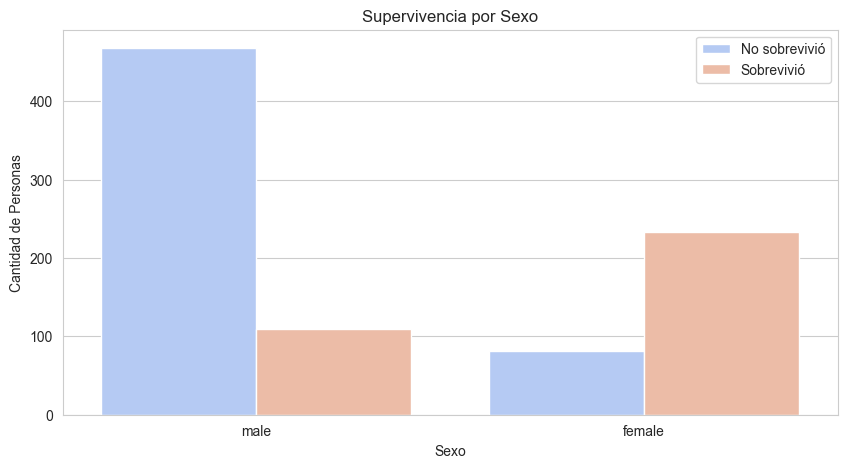

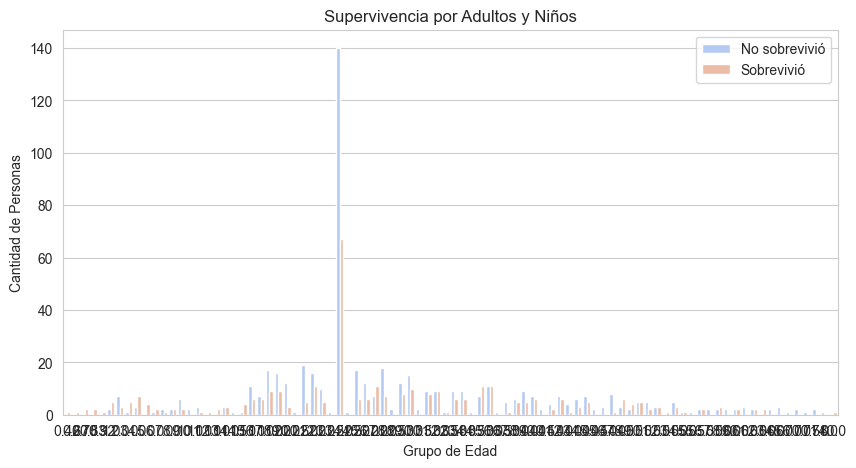

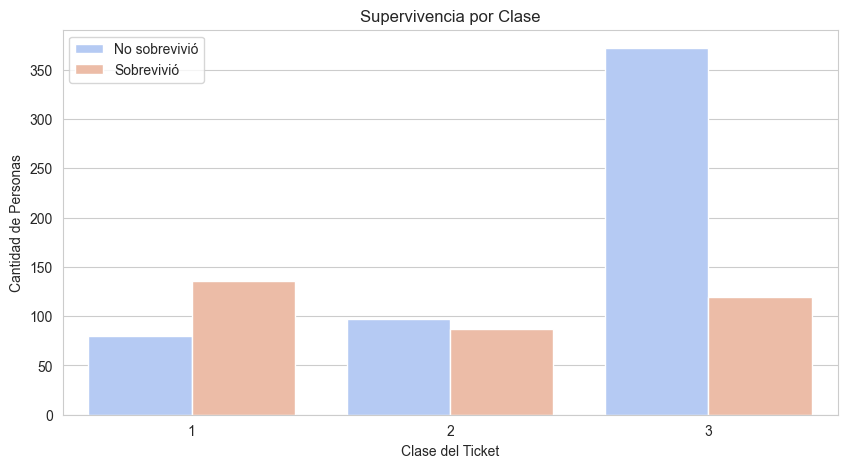

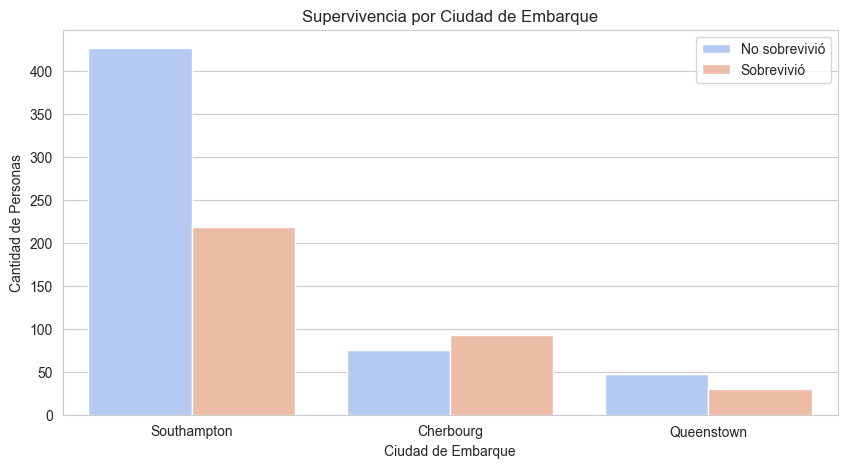

C:\Users\Xián\AppData\Local\Temp\ipykernel_2064\3903568103.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_titanic, x="survived", y="fare", palette="coolwarm")


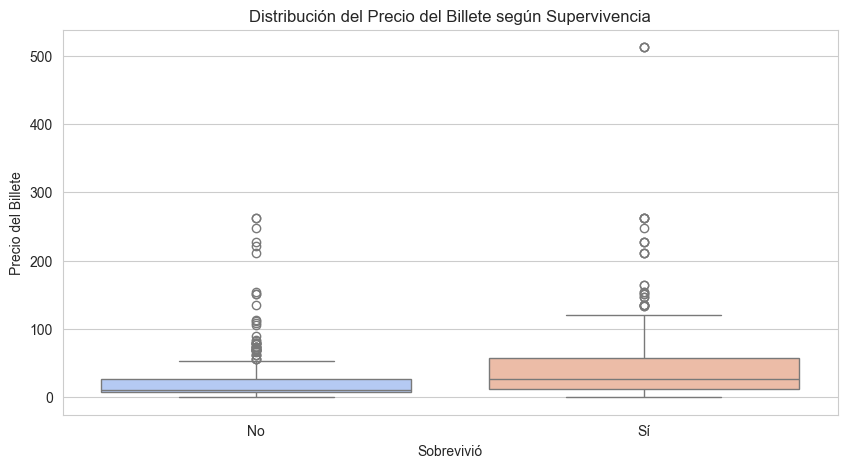

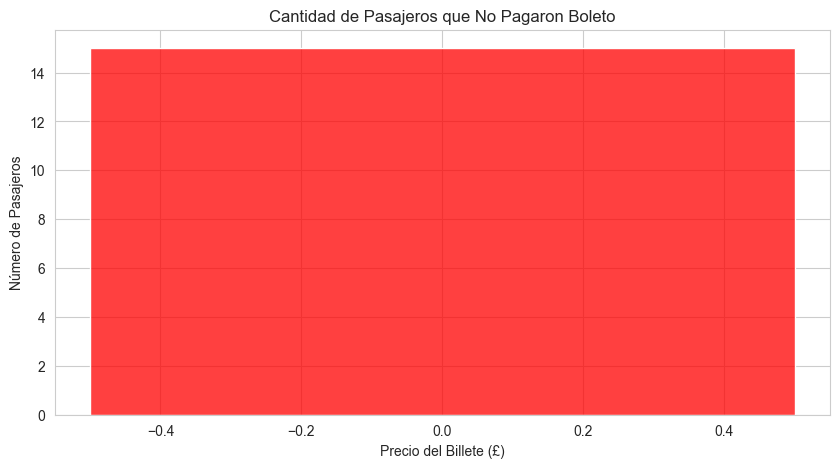

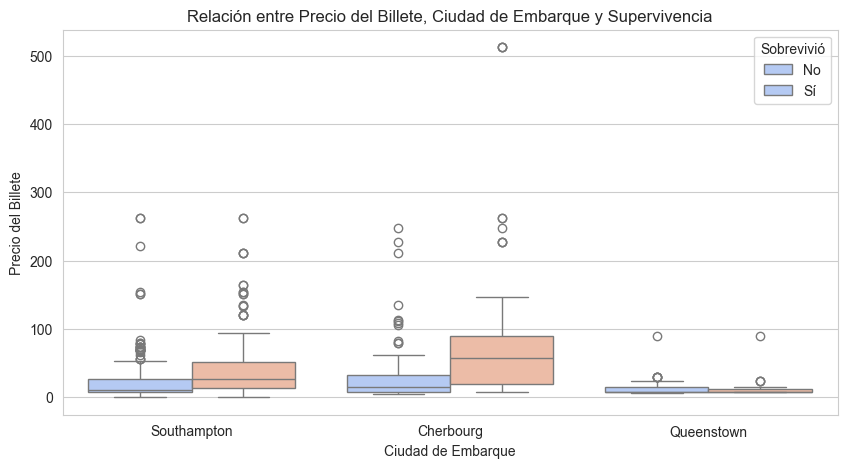

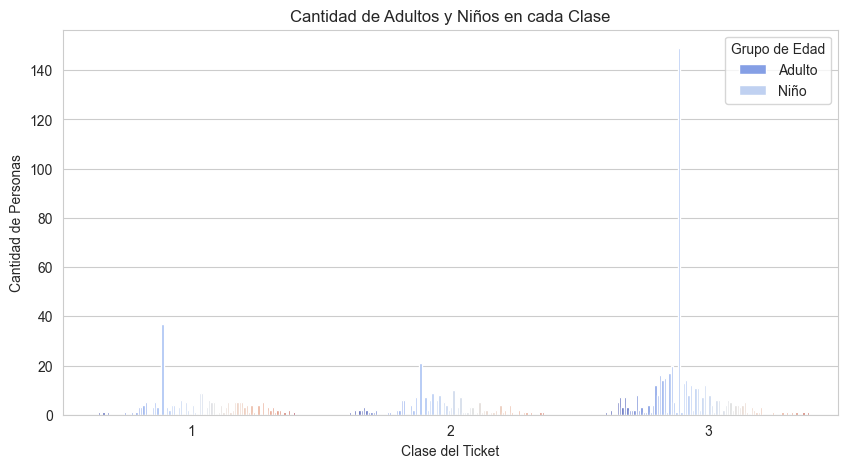

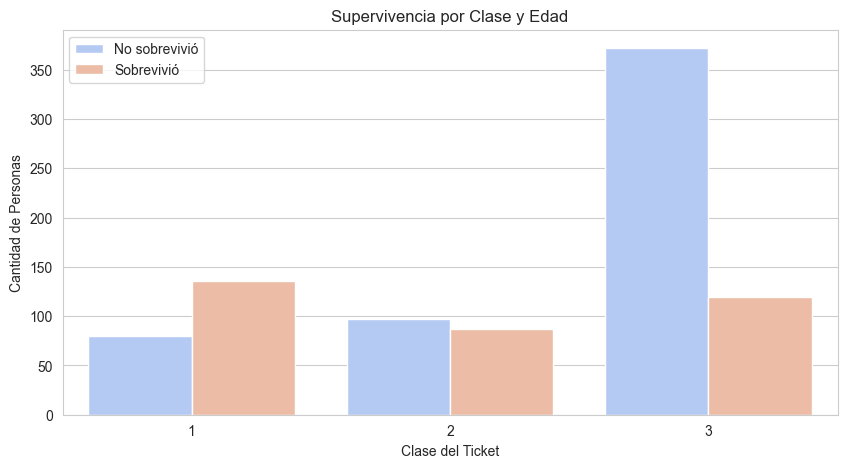

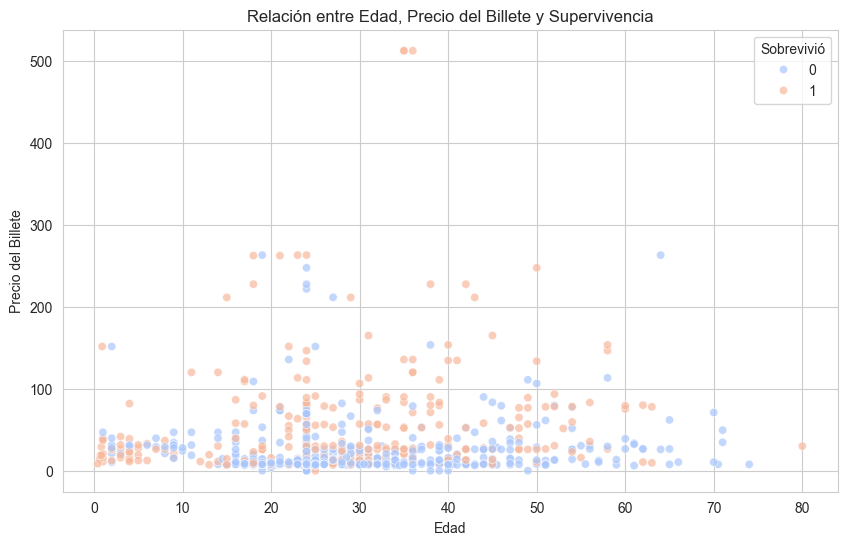

In [22]:
### Configuración de Seaborn para gráficos más claros
sns.set_style("whitegrid")

### Supervivencia por sexo
plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="sex", hue="survived", palette="coolwarm")
plt.title("Supervivencia por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de Personas")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

### Supervivencia por edad (adultos vs niños)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="age", hue="survived", palette="coolwarm")
plt.title("Supervivencia por Adultos y Niños")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Personas")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

### Supervivencia por clase
plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="pclass", hue="survived", palette="coolwarm")
plt.title("Supervivencia por Clase")
plt.xlabel("Clase del Ticket")
plt.ylabel("Cantidad de Personas")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

### Supervivencia por ciudad de embarque
plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="embark_town", hue="survived", palette="coolwarm")
plt.title("Supervivencia por Ciudad de Embarque")
plt.xlabel("Ciudad de Embarque")
plt.ylabel("Cantidad de Personas")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

### Relación entre precio del billete y supervivencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_titanic, x="survived", y="fare", palette="coolwarm")
plt.title("Distribución del Precio del Billete según Supervivencia")
plt.xlabel("Sobrevivió")
plt.ylabel("Precio del Billete")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

### Pasajeros que no pagaron boleto
plt.figure(figsize=(10, 5))
sns.histplot(df_titanic[df_titanic["fare"] == 0]["fare"], bins=1, kde=False, color="red")
plt.title("Cantidad de Pasajeros que No Pagaron Boleto")
plt.xlabel("Precio del Billete (£)")
plt.ylabel("Número de Pasajeros")
plt.show()

### Relación entre precio del billete, ciudad de embarque y supervivencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_titanic, x="embark_town", y="fare", hue="survived", palette="coolwarm")
plt.title("Relación entre Precio del Billete, Ciudad de Embarque y Supervivencia")
plt.xlabel("Ciudad de Embarque")
plt.ylabel("Precio del Billete")
plt.legend(title="Sobrevivió", labels=["No", "Sí"])
plt.show()

### Supervivencia por clase y edad
plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="pclass", hue="age", palette="coolwarm")
plt.title("Cantidad de Adultos y Niños en cada Clase")
plt.xlabel("Clase del Ticket")
plt.ylabel("Cantidad de Personas")
plt.legend(title="Grupo de Edad", labels=["Adulto", "Niño"])
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x="pclass", hue="survived", palette="coolwarm")
plt.title("Supervivencia por Clase y Edad")
plt.xlabel("Clase del Ticket")
plt.ylabel("Cantidad de Personas")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

### Relación entre edad, coste del billete y supervivencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="survived", palette="coolwarm", alpha=0.7)
plt.title("Relación entre Edad, Precio del Billete y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Precio del Billete")
plt.legend(title="Sobrevivió")
plt.show()


#1️ Supervivencia por sexo y edad:

Mujeres y niños sobrevivieron más en términos relativos.
Los hombres adultos fueron los que menos sobrevivieron.

#2️ Supervivencia por clase:

Primera clase tuvo más supervivientes en términos relativos y absolutos.
Tercera clase tuvo el menor porcentaje de supervivencia.

#3️ Supervivencia por ciudad de embarque:

Más pasajeros embarcaron en Southampton, pero Cherburgo tuvo una mayor tasa de supervivencia.

#4  Precio del billete y supervivencia:

Los supervivientes en general pagaron billetes más caros.
Los que pagaron menos tenían menos probabilidades de sobrevivir.

#5️  Pasajeros que no pagaron boleto y el boleto más caro:

Algunos pasajeros no pagaron boleto, posiblemente por ser tripulación o cortesías.
El boleto más caro costó £512.33, y el pasajero que lo compró sobrevivió.

#6️  Relación entre precio, ciudad de embarque y supervivencia:

Los pasajeros que embarcaron en Cherburgo pagaron boletos más caros en promedio.
Los que pagaron más tenían mayor probabilidad de sobrevivir.

#7️  Supervivencia por clase y edad:

Los niños de primera clase tuvieron la mayor tasa de supervivencia.
Los adultos de tercera clase fueron los que menos sobrevivieron.

#8️  Relación entre edad, coste del billete y supervivencia:

Los pasajeros jóvenes con boletos caros sobrevivieron más.
Los pasajeros mayores y de clase baja tuvieron menos probabilidades de sobrevivir.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [25]:
df_path = "./data/dataset_viajes_jun23.csv"
df_viajes = pd.read_csv(df_path)

df_viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

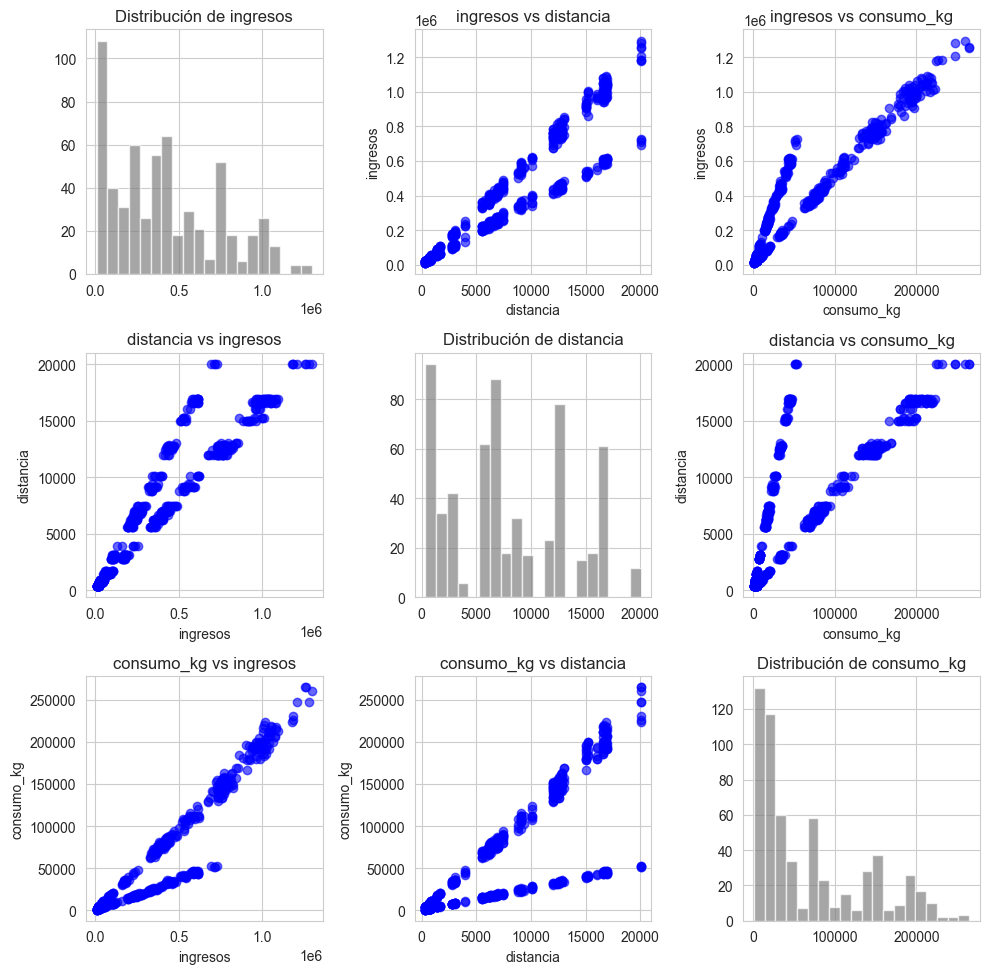

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

variables = ["ingresos", "distancia", "consumo_kg"]

for i in range(3):
    for j in range(3):
        if i == j:
          
            axes[i, j].hist(df_viajes[variables[i]], bins=20, color="gray", alpha=0.7)
            axes[i, j].set_title(f"Distribución de {variables[i]}")
        else:
         
            axes[i, j].scatter(df_viajes[variables[j]], df_viajes[variables[i]], alpha=0.6, color="blue")
            axes[i, j].set_xlabel(variables[j])
            axes[i, j].set_ylabel(variables[i])
            axes[i, j].set_title(f"{variables[i]} vs {variables[j]}")

plt.tight_layout()
plt.show()


Lo mejor q podemos observar son las "colas" generadas en la grafica de consumo e ingresos, la fuerte correlacion entre distancia e ingresos y distancia y consumo

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

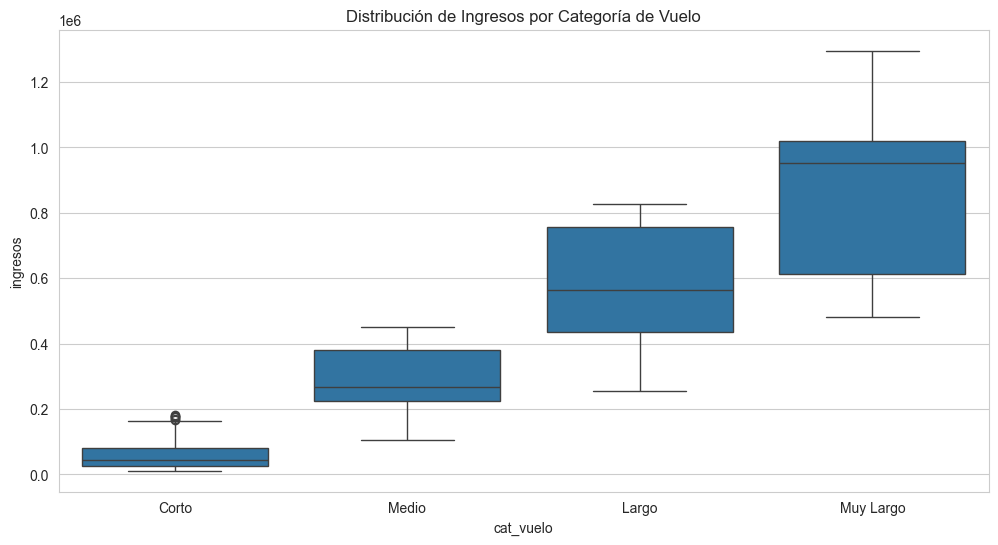

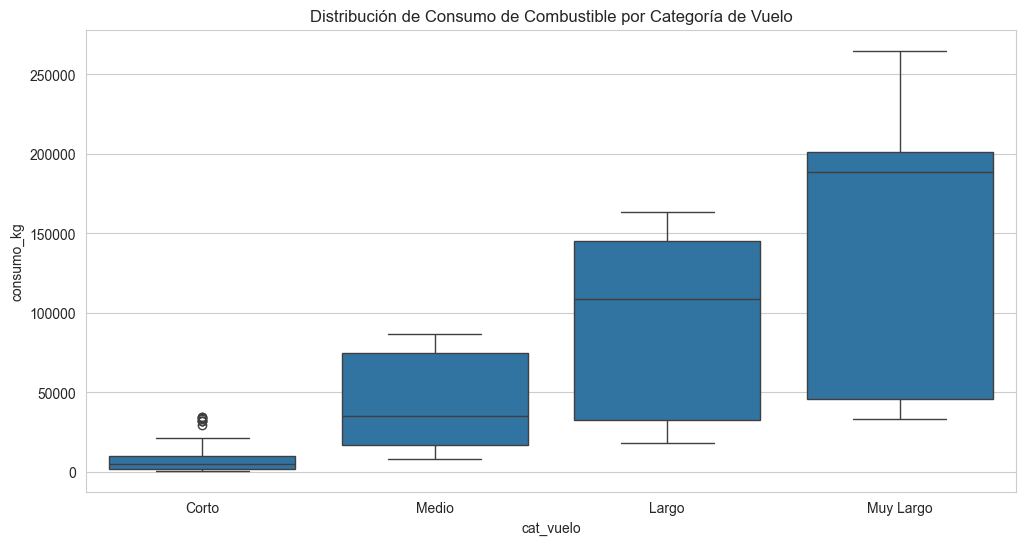

          ingresos                                                        \
             count           mean            std        min          25%   
cat_vuelo                                                                  
Corto        146.0   54811.594521   40229.833668   11797.85   25302.9775   
Medio        180.0  293330.824611   93877.274160  105371.44  225320.7075   
Largo        162.0  576111.876173  175034.648526  254577.67  434331.1425   
Muy Largo    112.0  867224.515446  217066.842778  482423.72  613705.8150   

                                                consumo_kg                 \
                  50%           75%         max      count           mean   
cat_vuelo                                                                   
Corto       44200.160  8.187912e+04   180927.63      146.0    7920.583571   
Medio      267596.115  3.809221e+05   449166.14      180.0   43766.272845   
Largo      564788.205  7.570702e+05   826490.02      162.0   94339.119756   
Muy L

C:\Users\Xián\AppData\Local\Temp\ipykernel_2064\655698482.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_viajes.groupby("cat_vuelo")[["ingresos", "consumo_kg"]].describe()


In [32]:
# Definir los rangos de la variable categórica "cat_vuelo" basado en la distribución de distancia
bins = [0, 3000, 7000, 13000, df_viajes['distancia'].max()]
labels = ["Corto", "Medio", "Largo", "Muy Largo"]

# Crear la variable categórica
df_viajes['cat_vuelo'] = pd.cut(df_viajes['distancia'], bins=bins, labels=labels, include_lowest=True)

# Análisis multivariante de "cat_vuelo", "ingresos", "consumo_kg"
plt.figure(figsize=(12, 6))
sns.boxplot(x="cat_vuelo", y="ingresos", data=df_viajes)
plt.title("Distribución de Ingresos por Categoría de Vuelo")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="cat_vuelo", y="consumo_kg", data=df_viajes)
plt.title("Distribución de Consumo de Combustible por Categoría de Vuelo")
plt.show()

# Resumen estadístico
summary = df_viajes.groupby("cat_vuelo")[["ingresos", "consumo_kg"]].describe()
print(summary)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.